In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import xarray as xr

In [2]:
@ticker.FuncFormatter
def lat_formatter(x, pos):
    if x > 0:
        return '{:d}$^\circ$N'.format(int(x))
    elif x == 0:
        return '{:d}$^\circ$'.format(int(x))
    else:
        return '{:d}$^\circ$S'.format(int(-x))

In [3]:
# figure root
fig_root = os.path.join(os.environ['HOME'], 'work', 'cmip6', 'projection', 'figures')
save_fig = True

In [4]:
e3sm_root = '/global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed'
caselist_H = [
    '20180215.DECKv1b_H1.ne30_oEC.edison',
    '20180220.DECKv1b_H2.ne30_oEC.edison',
    '20180302.DECKv1b_H3.ne30_oEC.edison',
    '20180305.DECKv1b_H4.ne30_oEC.edison',
    '20180307.DECKv1b_H5.ne30_oEC.edison',
    ]
caselist_HGHG = [
    '20190404.DECKv1b_H1_hist-GHG.ne30_oEC.edison',
    '20190404.DECKv1b_H2_hist-GHG.ne30_oEC.edison',
    '20190404.DECKv1b_H3_hist-GHG.ne30_oEC.edison',
    ]
caselist_P = [
    '20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl',
    '20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl',
    '20190821.DECKv1b_P3_SSP5-8.5.ne30_oEC.cori-knl',
    '20190821.DECKv1b_P4_SSP5-8.5.ne30_oEC.cori-knl',
    '20190821.DECKv1b_P5_SSP5-8.5.ne30_oEC.cori-knl',
    ]
caselist_PGHG = [
    '20191019.DECKv1b_P1_SSP5-8.5-GHG.ne30_oEC.cori-knl',
    '20191019.DECKv1b_P2_SSP5-8.5-GHG.ne30_oEC.cori-knl',
    '20191019.DECKv1b_P3_SSP5-8.5-GHG.ne30_oEC.cori-knl',
    ]
filenameH = 'mocStreamfunction_years1985-2014.nc'
filenameP = 'mocStreamfunction_years2070-2099.nc'

In [5]:
for i in np.arange(len(caselist_H)):
    casename = caselist_H[i]
    filepath = os.path.join(e3sm_root, casename, 'clim/mpas/avg', filenameH)
    ds = xr.open_dataset(filepath)
    if i == 0:
        depthH = ds.depth
        latH = ds.latAtlantic
        mocH = ds.mocAtlantic
    else:
        mocH += ds.mocAtlantic
mocH /= len(caselist_H)
for i in np.arange(len(caselist_HGHG)):
    casename = caselist_HGHG[i]
    filepath = os.path.join(e3sm_root, casename, 'clim/mpas/avg', filenameH)
    ds = xr.open_dataset(filepath)
    if i == 0:
        depthHGHG = ds.depth
        latHGHG = ds.latAtlantic
        mocHGHG = ds.mocAtlantic
    else:
        mocHGHG += ds.mocAtlantic
mocHGHG /= len(caselist_HGHG)
for i in np.arange(len(caselist_P)):
    casename = caselist_P[i]
    filepath = os.path.join(e3sm_root, casename, 'clim/mpas/avg', filenameP)
    ds = xr.open_dataset(filepath)
    if i == 0:
        depthP = ds.depth
        latP = ds.latAtlantic
        mocP = ds.mocAtlantic
    else:
        mocP += ds.mocAtlantic
mocP /= len(caselist_P)
for i in np.arange(len(caselist_PGHG)):
    casename = caselist_PGHG[i]
    filepath = os.path.join(e3sm_root, casename, 'clim/mpas/avg', filenameP)
    ds = xr.open_dataset(filepath)
    if i == 0:
        depthPGHG = ds.depth
        latPGHG = ds.latAtlantic
        mocPGHG = ds.mocAtlantic
    else:
        mocPGHG += ds.mocAtlantic
mocPGHG /= len(caselist_PGHG)

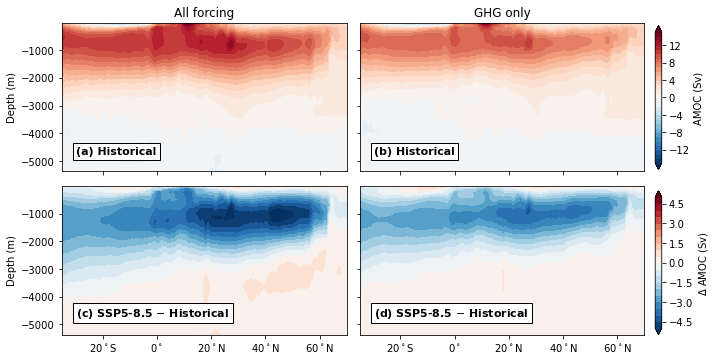

In [6]:
levels = np.linspace(-15, 15, 31)
levels_diff = np.linspace(-5, 5, 21)
fig, axarr = plt.subplots(2, 2, sharex='col', sharey='row')
fig.set_size_inches([10, 5])
im1 = axarr[0,0].contourf(latH, -depthH, mocH, cmap='RdBu_r', extend='both', levels=levels)
axarr[0,1].contourf(latHGHG, -depthHGHG, mocHGHG, cmap='RdBu_r', extend='both', levels=levels)
im2 = axarr[1,0].contourf(latH, -depthH, mocP-mocH, cmap='RdBu_r', extend='both', levels=levels_diff)
axarr[1,1].contourf(latHGHG, -depthHGHG, mocPGHG-mocHGHG, cmap='RdBu_r', extend='both', levels=levels_diff)
axarr[0,0].set_title('All forcing')
axarr[0,1].set_title('GHG only')
for i in np.arange(2):
    axarr[i,0].set_ylabel('Depth (m)')
    axarr[0,i].set_xlim([-35, 70])
    axarr[1,i].get_xaxis().set_major_formatter(lat_formatter)

axarr[0,0].text(0.05, 0.1, '(a) Historical', transform=axarr[0,0].transAxes,
                fontsize=11, color='k', fontweight='bold', va='bottom',
                bbox=dict(boxstyle="square",ec='k',fc='w'))
axarr[0,1].text(0.05, 0.1, '(b) Historical', transform=axarr[0,1].transAxes,
                fontsize=11, color='k', fontweight='bold', va='bottom',
                bbox=dict(boxstyle="square",ec='k',fc='w'))
axarr[1,0].text(0.05, 0.1, '(c) SSP5-8.5 $-$ Historical', transform=axarr[1,0].transAxes,
                fontsize=11, color='k', fontweight='bold', va='bottom',
                bbox=dict(boxstyle="square",ec='k',fc='w'))
axarr[1,1].text(0.05, 0.1, '(d) SSP5-8.5 $-$ Historical', transform=axarr[1,1].transAxes,
                fontsize=11, color='k', fontweight='bold', va='bottom',
                bbox=dict(boxstyle="square",ec='k',fc='w'))
    
# reduce margin
plt.tight_layout()

# colorbar
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(top=0.95)
cax1 = plt.axes([0.83, 0.542, 0.1, 0.4])
cax1.set_visible(False)
cb1 = plt.colorbar(im1, ax=cax1)
cb1.set_label('AMOC (Sv)')
cax2 = plt.axes([0.83, 0.083, 0.1, 0.4])
cax2.set_visible(False)
cb2 = plt.colorbar(im2, ax=cax2)
cb2.set_label('$\Delta$ AMOC (Sv)')

if save_fig:
    figname = fig_root+'/CMIP6_ScenarioMIP_Climo_AMOC.png'
    fig.savefig(figname, dpi = 300)